In [5]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
import requests
import json
from PIL import Image

In [6]:
stations = pd.read_csv('../../data/03_datasets/stations.csv')

In [7]:
filt = stations.latitude>-40
x,y = stations.longitude[filt],stations.latitude[filt]

In [9]:

url = 'http://localhost:5000/plot'
data = {"long":x.to_list(),"lat":y.to_list(),"hue":x.to_list()}

test_data = {
    "hue": [
        1.0,
        2.0,
        3.0
    ],
    "lat": [
        1.0,
        2.0,
        3.0
    ],
    "long": [
        1.0,
        2.0,
        3.0
    ]}

def plot_image(resp):
    plt.axis('off')
    _ = plt.imshow(np.array(resp['img']),)
    
def plot(info):
    a = sns.scatterplot(info['long'],info['lat'],hue = info['hue']).figure
    a.savefig('temp2.png')
    img = Image.open('temp2.png')
    return({'img': np.asarray(img).tolist()})

In [10]:
resp = requests.post(url,json = data)
xx = json.loads(resp.content)

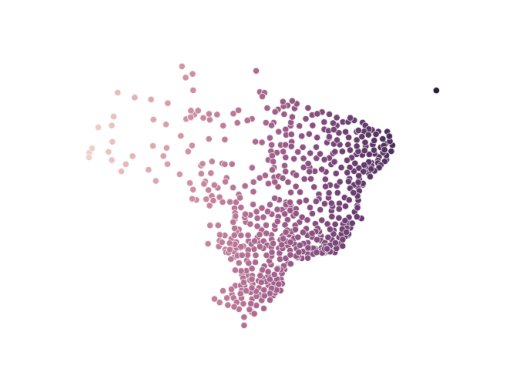

In [11]:
plot_image(xx)